<table class="table table-bordered">
    <tr>
        <th style="text-align:center;"><h1>Supervised Machine Learning</h1><h2>Lab 4 - Support Vector Machine </h2></th>
    </tr>
</table>

In [43]:
# Import the requried packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model, neighbors, tree, svm, ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate

### 1.Classification

We will be using the bank marketing campaign data for classification task. We take a small sample (3000 records) to train the model as SVM model takes longer time to train. Feel free to practice at home using the full dataset. 

In [44]:
# Loading the data
bank = pd.read_csv('bank.csv')
print(bank.head())
# Encode the categorical data into numbers
bank_cat = bank.select_dtypes(['object']).copy()
for col in bank_cat:
    print(col, ':')
    codes, uniques = pd.factorize(bank_cat[col], sort=True)
    bank[col]=codes
    print(uniques)
print(bank.head())

# Sample a small subset of the data
bank = bank.sample(3000, random_state =5)
print('\n samples by target categories:')
print(bank.deposit.value_counts())
  
# Set the "deposit" as target/model output and the rest features as model inputs
y = bank['deposit']
X = bank.drop(['deposit'], axis=1)

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#Sacaling the data into a smaller range (-3 to +3)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
job :
Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 

#### 1.1 Linear Kernel

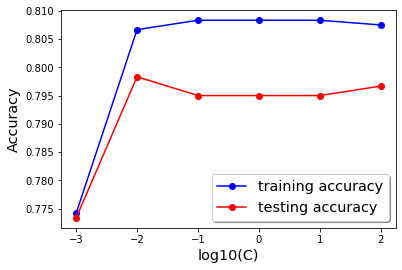

In [45]:
# Find the best C
C_range = [0.001, 0.01, 0.1,1,10,100]

train_accuracy = []
test_accuracy = []

for C in C_range:
    svm_clf = svm.SVC(kernel="linear", C=C) # also we can use Linear SVC
    svm_clf.fit(X_train, y_train) 
    train_accuracy.append(svm_clf.score(X_train, y_train))
    test_accuracy.append(svm_clf.score(X_test, y_test))
    
#Plot the train & test accuracy
plt.plot(np.log10(C_range), train_accuracy, 'bo-', label ='training accuracy')
plt.plot(np.log10(C_range), test_accuracy, 'ro-', label = 'testing accuracy')

plt.xlabel('log10(C)', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [46]:
#Final Model
svm_clf = svm.SVC(kernel='linear', C=0.01)
svm_clf.fit(X_train, y_train)

SVC(C=0.01, kernel='linear')

In [47]:
print('train_acc:', svm_clf.score(X_train, y_train), 
      '\n test_acc:', svm_clf.score(X_test, y_test))

train_acc: 0.8066666666666666 
 test_acc: 0.7983333333333333


#### 1.2 Polynomial Kernel

In [48]:
# Use GridSearch to find the best combination of model hyperparameters
from sklearn.model_selection import GridSearchCV

svm_clf = svm.SVC(kernel="poly")

param_grid = {"degree" : range(0,5), 
              "coef0" : [0,1], #coef0 controls how much the model is influenced by highdegree polynomials versus low-degree polynomials
              'C' : [0.001, 0.01, 0.1, 1, 10, 100]}

gs_clf = GridSearchCV(svm_clf, param_grid=param_grid, scoring='accuracy', cv= 5, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'coef0': [0, 1],
                         'degree': range(0, 5)},
             scoring='accuracy')

In [49]:
print(gs_clf.best_score_)
print(gs_clf.best_params_)
print(gs_clf.best_estimator_)

0.81375
{'C': 10, 'coef0': 1, 'degree': 2}
SVC(C=10, coef0=1, degree=2, kernel='poly')


In [50]:
#Final Model
svm_clf = gs_clf.best_estimator_
svm_clf.fit(X_train, y_train)

print('train_acc:', svm_clf.score(X_train, y_train), 
      '\n test_acc:', svm_clf.score(X_test, y_test))

train_acc: 0.8416666666666667 
 test_acc: 0.805


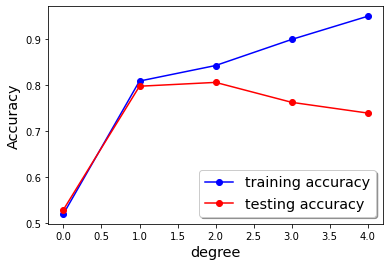

In [51]:
# Understand the impact of degree
degree_range = range(0,5)

train_accuracy = []
test_accuracy = []

for d in degree_range:
    svm_clf = svm.SVC(kernel="poly", C=10, degree =d, coef0=1)
    svm_clf.fit(X_train, y_train) 
    train_accuracy.append(svm_clf.score(X_train, y_train))
    test_accuracy.append(svm_clf.score(X_test, y_test))
    
#Plot the train & test accuracy
plt.plot(degree_range, train_accuracy, 'bo-', label ='training accuracy')
plt.plot(degree_range, test_accuracy, 'ro-', label = 'testing accuracy')

plt.xlabel('degree', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [52]:
test_accuracy

[0.5283333333333333,
 0.7966666666666666,
 0.805,
 0.7616666666666667,
 0.7383333333333333]

#### 1.3 RBF Kernel

In [53]:
# Use GridSearch to find the best combination of model hyperparameters
from sklearn.model_selection import GridSearchCV

svm_clf = svm.SVC(kernel="rbf")

param_grid = {"gamma" : [0.01,0.1,0.3,10,100], 
              'C' : [0.001, 0.01,0.1, 10, 100]}

gs_clf2 = GridSearchCV(svm_clf, param_grid=param_grid, scoring='accuracy', cv= 5, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_clf2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 10, 100],
                         'gamma': [0.01, 0.1, 0.3, 10, 100]},
             scoring='accuracy')

In [54]:
print(gs_clf2.best_score_)
print(gs_clf2.best_params_)
print(gs_clf2.best_estimator_)

0.8154166666666667
{'C': 10, 'gamma': 0.01}
SVC(C=10, gamma=0.01)


In [55]:
#Final Model
svm_clf = gs_clf2.best_estimator_
svm_clf.fit(X_train, y_train)

print('train_acc:', svm_clf.score(X_train, y_train), 
      '\n test_acc:', svm_clf.score(X_test, y_test))

train_acc: 0.83375 
 test_acc: 0.825


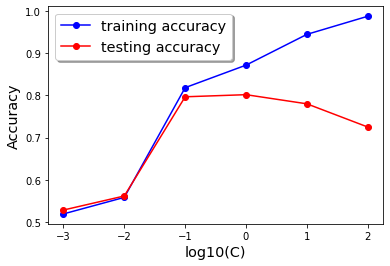

In [56]:
# Understand the impact of C
C_range =  [0.001, 0.01,0.1, 1, 10, 100]
train_accuracy = []
test_accuracy = []

for C in C_range:
    svm_clf = svm.SVC(kernel="rbf", gamma=0.1, C=C)
    svm_clf.fit(X_train, y_train) 
    train_accuracy.append(svm_clf.score(X_train, y_train))
    test_accuracy.append(svm_clf.score(X_test, y_test))
    
#Plot the train & test accuracy
plt.plot(np.log10(C_range), train_accuracy, 'bo-', label ='training accuracy')
plt.plot(np.log10(C_range), test_accuracy, 'ro-', label = 'testing accuracy')

plt.xlabel('log10(C)', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

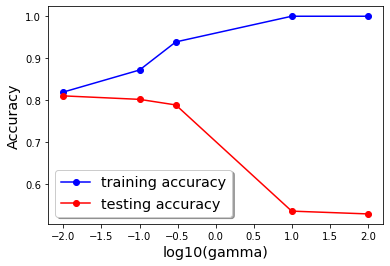

In [57]:
# Understand the impact of gamma
g_range = [0.01,0.1,0.3,10,100]
train_accuracy = []
test_accuracy = []

for g in g_range:
    svm_clf = svm.SVC(kernel="rbf", gamma=g, C=1)
    svm_clf.fit(X_train, y_train) 
    train_accuracy.append(svm_clf.score(X_train, y_train))
    test_accuracy.append(svm_clf.score(X_test, y_test))
    
#Plot the train & test accuracy
plt.plot(np.log10(g_range), train_accuracy, 'bo-', label ='training accuracy')
plt.plot(np.log10(g_range), test_accuracy, 'ro-', label = 'testing accuracy')

plt.xlabel('log10(gamma)', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

### 3. Regression
We will be using the supermarket data for regression task. We take a small sample (3000 records) to train the model as SVM model takes longer time to train. Feel free to practice at home using the full dataset. 

In [58]:
# Loading the data
supermarket = pd.read_csv('supermarket.csv')
print(supermarket.head())

# Encode the categorical data into numbers
supermarket_cat = supermarket.select_dtypes(['object']).copy()
for col in supermarket_cat:
    print(col, ':')
    codes, uniques = pd.factorize(supermarket_cat[col], sort=True)
    supermarket[col]=codes
    print(uniques)
print(supermarket.head())

# Sample a small subset of the data
supermarket = supermarket.sample(3000, random_state =5)


# Set the "Sales" as target/model output and the rest features as model inputs
y = supermarket['Item_Outlet_Sales']
X = supermarket.drop(['Item_Outlet_Sales'], axis=1)

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#Sacaling the data into a smaller range (-3 to +3)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

   Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   
3  182.0950            OUT010                       1998         NaN   
4   53.8614            OUT013                       1987        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          37

In [59]:
# Use GridSearch to find the best combination of model hyperparameters
from sklearn.model_selection import GridSearchCV

svm_reg = svm.SVR()

param_grid = {"kernel": ['linear','rbf'],
              'epsilon': [0.1,1,10,100],
              "gamma" : [0.001,0.01,0.1,1,10], 
              'C' : [0.01,0.1,1,10,100,1000]}

gs_reg = GridSearchCV(svm_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 5, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_reg.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [60]:
print(gs_reg.best_score_)
print(gs_reg.best_params_)
print(gs_reg.best_estimator_)

-1008932.3553691211
{'C': 1000, 'epsilon': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVR(C=1000, epsilon=100, gamma=0.1)


In [61]:
#Final Model
svm_reg = gs_reg.best_estimator_
svm_reg.fit(X_train, y_train)

print('train_mae:', mean_absolute_error(svm_reg.predict(X_train), y_train), 
      '\n test_mae:', mean_absolute_error(svm_reg.predict(X_test), y_test))

train_mae: 661.0767459699662 
 test_mae: 701.3404674649511


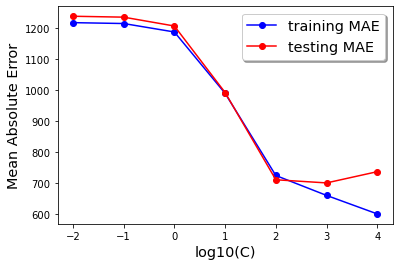

In [62]:
# Understand the impact of C
C_range = [0.01,0.1,1,10,100,1000, 10000]
train_mae = []
test_mae = []

for C in C_range:
    svm_reg = svm.SVR(kernel="rbf",gamma =0.1, C=C, epsilon =100)
    svm_reg.fit(X_train, y_train) 
    train_mae.append(mean_absolute_error(svm_reg.predict(X_train), y_train))
    test_mae.append(mean_absolute_error(svm_reg.predict(X_test), y_test))
    
#Plot the train & test mae
plt.plot(np.log10(C_range), train_mae, 'bo-', label ='training MAE')
plt.plot(np.log10(C_range), test_mae, 'ro-', label = 'testing MAE')

plt.xlabel('log10(C)', fontsize='x-large')
plt.ylabel('Mean Absolute Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [63]:
X_train


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4815,1.120931,-0.740377,2.064525,1.350581,0.411219,-1.641602,-0.012198,-1.331443,1.105219,-1.529641
3601,-1.855172,-0.740377,-1.290068,1.585328,0.841595,0.789972,0.473686,-1.331443,-0.124510,-0.226432
4543,1.864957,-0.740377,-0.809925,0.176843,0.193888,0.442604,0.716628,1.216773,-0.124510,-0.226432
906,-0.178162,-0.740377,-0.518860,-0.292652,0.643353,1.137340,-0.133669,1.216773,-1.354239,-0.226432
7530,-0.603319,1.350100,-0.334043,-0.996894,-0.963663,-1.294234,-1.348378,-0.482038,1.105219,-0.226432
...,...,...,...,...,...,...,...,...,...,...
2923,0.235186,-0.740377,-0.691204,0.881086,-1.605915,1.137340,-0.133669,1.216773,-1.354239,-0.226432
4697,-0.485220,-0.740377,0.598231,0.646338,-0.627994,-0.599499,1.323983,0.367368,1.105219,1.076776
675,-0.060062,-0.740377,-1.147697,0.411591,0.790649,-1.294234,-1.348378,-0.482038,1.105219,-0.226432
295,0.683964,-0.740377,1.411988,-0.057904,1.839731,-0.946867,1.081041,-1.331443,-0.124510,-0.226432


In [64]:
y_train

4815     163.7868
3601    4933.5780
4543     890.8404
906     1611.9018
7530     239.6880
          ...    
2923     639.1680
4697    1884.8798
675     2816.3340
295     2775.7202
4217     111.1886
Name: Item_Outlet_Sales, Length: 2400, dtype: float64

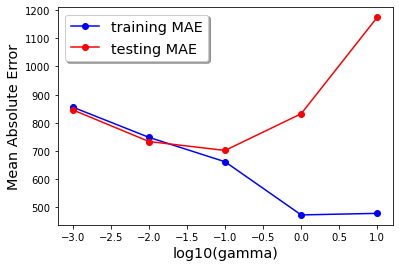

In [65]:
# Understand the impact of gamma
g_range = [0.001,0.01,0.1,1,10]
train_mae = []
test_mae = []

for g in g_range:
    svm_reg = svm.SVR(kernel="rbf",gamma=g, C=1000, epsilon =100)
    svm_reg.fit(X_train, y_train) 
    train_mae.append(mean_absolute_error(svm_reg.predict(X_train), y_train))
    test_mae.append(mean_absolute_error(svm_reg.predict(X_test), y_test))
    
#Plot the train & test mae
plt.plot(np.log10(g_range), train_mae, 'bo-', label ='training MAE')
plt.plot(np.log10(g_range), test_mae, 'ro-', label = 'testing MAE')

plt.xlabel('log10(gamma)', fontsize='x-large')
plt.ylabel('Mean Absolute Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

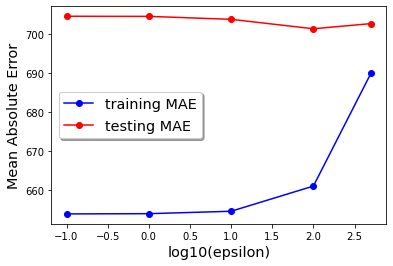

In [68]:
# Understand the impact of epsilon
e_range = [0.1,1,10,100,500]
train_mae = []
test_mae = []

for e in e_range:
    svm_reg = svm.SVR(kernel="rbf",gamma =0.1, C=1000, epsilon =e)
    svm_reg.fit(X_train, y_train) 
    train_mae.append(mean_absolute_error(svm_reg.predict(X_train), y_train))
    test_mae.append(mean_absolute_error(svm_reg.predict(X_test), y_test))
    
#Plot the train & test mae
plt.plot(np.log10(e_range), train_mae, 'bo-', label ='training MAE')
plt.plot(np.log10(e_range), test_mae, 'ro-', label = 'testing MAE')

plt.xlabel('log10(epsilon)', fontsize='x-large')
plt.ylabel('Mean Absolute Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()